In [29]:
#Importing Libraries
# Pandas,Numpy, Matplotlib, Seaborn, Json, request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
import requests
import random

## Reading data from local csv file
Dataset Source : https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [30]:
#Importing CSV files
#TMDB dataset source : https://www.kaggle.com/tmdb/tmdb-movie-metadata


#this file contains TMDB movies data
df_movies=pd.read_csv('tmdb_5000_movies.csv')

#this file contains TMDB movies Credit data
df_credits=pd.read_csv('tmdb_5000_credits.csv')

#df_movies.info()
#df_credits.info()

In [31]:
df_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [32]:
#Merging Movies dataframe & Credits dataframe on Movie_id column
df_movies = df_movies.merge(df_credits, left_on='id', right_on='movie_id')
df_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [33]:
#Dropping duplicates
df_movies.drop_duplicates(inplace=True)
#Checking duplicates
df_movies.duplicated().sum()

0

In [34]:
#Checking null values
df_movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [35]:
#filling 'tagline' and 'overview' column NULL values with specific text
df_movies.tagline.fillna('unspecified tagline',inplace=True)
df_movies.overview.fillna('unspecified overview',inplace=True)

In [36]:
#Droping 'homepage column'
df_movies.drop('homepage', inplace=True, axis=1)

In [37]:
#Dropping all remaining null value containing rows and all duplicate rows
df_movies.dropna(inplace=True)

In [38]:
#Checking null values
df_movies.isnull().sum()

#df_movies = df_movies.reset_index(drop=True)

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_x                 0
vote_average            0
vote_count              0
movie_id                0
title_y                 0
cast                    0
crew                    0
dtype: int64

In [39]:
#checking 0 budget and revenue
# Checking for an zero values in the budget and revenue columns

print("Rows With Zero Values In The Budget Column:",df_movies[(df_movies['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df_movies[(df_movies['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 1036
Rows With Zero Values In The Revenue Column: 1424


In [40]:
#zero budget
#Using loc to filter rows
zero_budget = df_movies.loc[df_movies['budget']==0,:]
zero_budget.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366,10588,The Cat in the Hat,"[{""cast_id"": 1, ""character"": ""The Cat"", ""credi...","[{""credit_id"": ""52fe438d9251416c75014d95"", ""de..."
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",77953,"[{""id"": 6078, ""name"": ""politics""}, {""id"": 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,May The Best Loser Win.,The Campaign,5.6,578,77953,The Campaign,"[{""cast_id"": 12, ""character"": ""Cam Brady"", ""cr...","[{""credit_id"": ""587ea5eb9251413f1b02b874"", ""de..."
359,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",258509,"[{""id"": 10986, ""name"": ""chipmunk""}, {""id"": 109...",en,Alvin and the Chipmunks: The Road Chip,"Through a series of misunderstandings, Alvin, ...",27.867368,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fast & furry-ous,Alvin and the Chipmunks: The Road Chip,5.8,428,258509,Alvin and the Chipmunks: The Road Chip,"[{""cast_id"": 16, ""character"": ""Dave"", ""credit_...","[{""credit_id"": ""565c2c3f9251416919007486"", ""de..."


In [41]:
#zero Revenue
#Using loc to filter rows
zero_revenue = df_movies.loc[df_movies['revenue']==0,:]
zero_revenue.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34,79698,The Lovers,"[{""cast_id"": 11, ""character"": ""James Stewart /...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de..."
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,7978,The Wolfman,"[{""cast_id"": 3, ""character"": ""Lawrence Talbot""...","[{""credit_id"": ""538aeb0a0e0a266718000fc2"", ""de..."
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366,10588,The Cat in the Hat,"[{""cast_id"": 1, ""character"": ""The Cat"", ""credi...","[{""credit_id"": ""52fe438d9251416c75014d95"", ""de..."


# Visualization

In [43]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4800 non-null   int64  
 1   genres                4800 non-null   object 
 2   id                    4800 non-null   int64  
 3   keywords              4800 non-null   object 
 4   original_language     4800 non-null   object 
 5   original_title        4800 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4800 non-null   float64
 8   production_companies  4800 non-null   object 
 9   production_countries  4800 non-null   object 
 10  release_date          4800 non-null   object 
 11  revenue               4800 non-null   int64  
 12  runtime               4800 non-null   float64
 13  spoken_languages      4800 non-null   object 
 14  status                4800 non-null   object 
 15  tagline              

In [45]:
#the the given in the dataset is in string format.
#So we need to change this in datetime format

df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['release_date'].head()


#extracting movie release year from the date column and creating a new column release_year
df_movies['release_year'] = df_movies['release_date'].dt.strftime('%Y')
#Converting dataType object to int
df_movies['release_year'] = df_movies['release_year'].astype("int64")
#df_movies.info()

release_year
2013    231
2014    238
2015    214
2016    104
2017      1
Name: id, dtype: int64


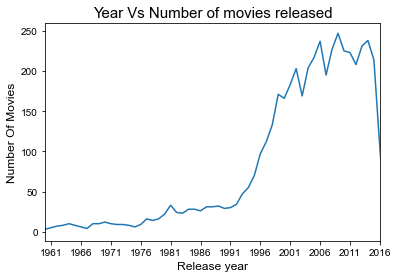

In [46]:
#Year wise Movies Release status

# making group for each year and count the number of movies in each of that year 
year_wise_movie_release=df_movies.groupby('release_year').count()['id']
print(year_wise_movie_release.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
year_wise_movie_release.plot(xticks = np.arange(1916,2017,5))

#set the figure size and labels
plt.title("Year Vs Number of movies released",fontsize = 15)
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Number Of Movies',fontsize = 12)
sns.set_style("whitegrid")
#Cropping desired plot
plt.xlim([1960,2016])
plt.show()

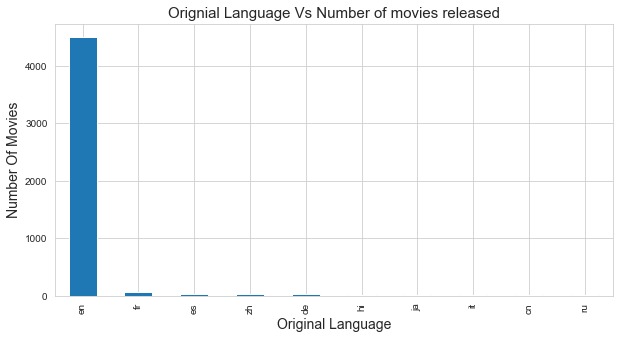

In [47]:
#Language wise movies distribution

#Grouping Values into 'original_language' and then counting the number of movies in that 'original_language'
#then shorting them in descending order

language_groups = df_movies.groupby(['original_language'])['id'].count().sort_values(ascending=False)
#Getting top 10 languages
top_origin_language = language_groups.head(10)
#Drawing Bar Graph of this 

top_origin_language.plot(kind='bar', figsize=(10, 5))
plt.title("Orignial Language Vs Number of movies released",fontsize = 15)
plt.xlabel('Original Language',fontsize = 14)
plt.ylabel('Number Of Movies',fontsize = 14)
plt.show()

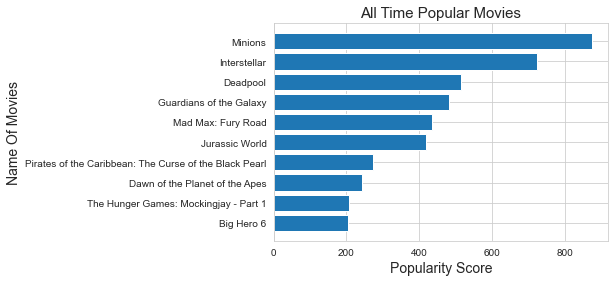

In [48]:
#Get popular movies

#Shorting movies by popularity column ( int )
sorted_popularity = df_movies.sort_values(by = 'popularity',ascending= False)

#Inverting Y axis
plt.gca().invert_yaxis()
plt.title
#Making horizontal bar plot
plt.barh(sorted_popularity['original_title'].head(10),sorted_popularity['popularity'].head(10))

plt.title("All Time Popular Movies",fontsize = 15)
plt.xlabel('Popularity Score',fontsize = 14)
plt.ylabel('Name Of Movies',fontsize = 14)

plt.show()

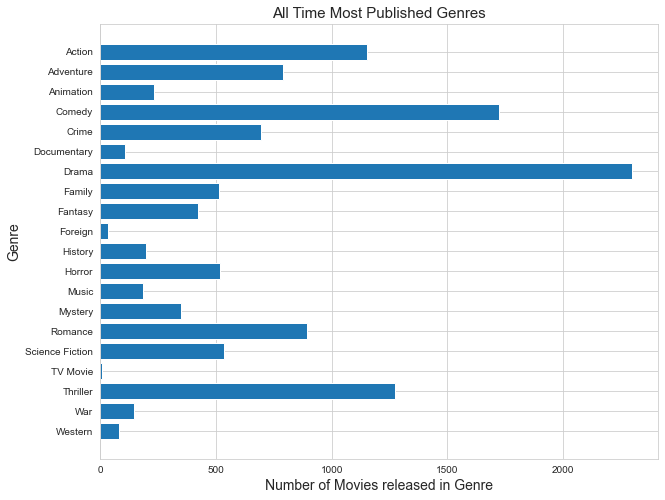

In [49]:
#Showing Popular Genres

#Creating Empty List
genres_list = list()

for i in df_movies['genres']:
    data = json.loads(i)
    #parsing every genre from this movie
    for dictonary in data:
        #Getting data of key-value pair
        genres_list.append(dictonary.get('name'))

#print(genres_list)
#Converting list to numpy array to find unique values
genres_array = np.array(genres_list)
unique, counts = np.unique(genres_array, return_counts=True)

#showing plot
plt.subplots(figsize=(10,8))
plt.title("All Time Most Published Genres",fontsize = 15)
plt.xlabel('Number of Movies released in Genre',fontsize = 14)
plt.ylabel('Genre',fontsize = 14)
plt.gca().invert_yaxis()
plt.barh(unique,counts)
plt.show()

<AxesSubplot:>

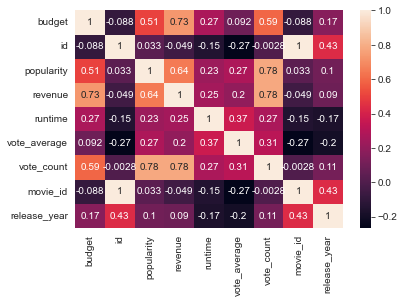

In [50]:
#Correlation between variables

sns.heatmap(df_movies.corr(), annot = True)

In [51]:
# Highest rated movies

#sort the 'vote_average' column in decending order and store it in the new dataframe.
highest_rated_movies =  df_movies.sort_values(by = 'vote_average',ascending= False)

highest_rated_movies = highest_rated_movies.head(10)

print("Columns of dataframe")
print(highest_rated_movies.columns)

print("column number of original_title column")
print(highest_rated_movies.columns.get_loc('original_title'))

print("column number of vote_average column")
print(highest_rated_movies.columns.get_loc('vote_average'))

Columns of dataframe
Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew', 'release_year'],
      dtype='object')
column number of original_title column
5
column number of vote_average column
17


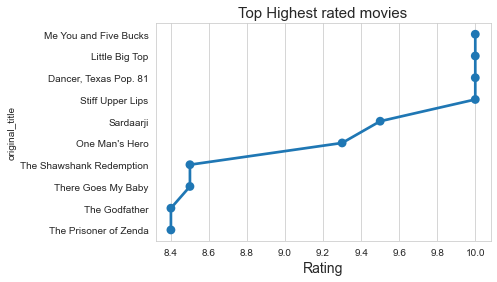

In [52]:
#Using iLoc to get value of columns and convert them to numpy array
#With iloc we have to use column number wehereas we use column name with loc
X = highest_rated_movies.iloc[:,5]
Y = highest_rated_movies.iloc[:,17]

#Plotting point graph with seaborn library
ax = sns.pointplot(x=Y,y=X)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top Highest rated movies",fontsize = 15)
ax.set_xlabel("Rating",fontsize = 14)
sns.set_style("darkgrid")

In [53]:
# Reusable function to get data from tmdb API

def show_full_movie_detail_from_tmdb(movie_id):
    api_url = 'https://api.themoviedb.org/3/movie/'+ str(movie_id) + '?api_key=aefefef46369fdf0d6421312a28a9d87'
    #print(api_url)
    response = requests.get(api_url)
    if(response.status_code==200):
        #print(api_url)
        json_response = response.json()
        
        print("Movie Name : "+ json_response['original_title'])
        print("tagline : " + json_response['tagline'])
        print("\n")
        print("popularity : " + str(json_response['popularity']))
        print("release_date : " + json_response['release_date'])
        print("budget : " + str(json_response['budget']))
        poster_path = json_response['poster_path']
        poster_full_url = 'http://image.tmdb.org/t/p/w500'+poster_path
        print("Poster URL : " + poster_full_url)
    else:
        print("Couldn't find movie online, Please try again")
    


In [54]:
# Randmoly select 2 movie and getting its data from tmdb online api

movie_id_list = list()

#iterating ID column from dataframe
for index, row in df_movies.iterrows():
    movie_id_list.append(row["id"])

#Creating empty 1-d numpy array
random_movies_array = np.array([])
#appending 10 random movie ids to this array
for i in range (0,10):
    tmp_movie_id = random.choice(movie_id_list)
    random_movies_array = np.append(random_movies_array, tmp_movie_id)

print(random_movies_array)

#Slicing first 3rd & 4th ids from these 10
movies_array = random_movies_array[2:4]
print(movies_array)  

#using for loop to show details of these two random movies form tmdb API
for mv_id in movies_array:
    print("------\n")
    show_full_movie_detail_from_tmdb(mv_id)

[2.0862e+04 3.4500e+02 1.6653e+04 1.4359e+04 1.2000e+01 8.4870e+03
 1.0894e+04 1.1600e+04 4.8217e+04 1.2106e+04]
[16653. 14359.]
------

Movie Name : The Singles Ward
tagline : The Road to Eternal Marriage Has Never Been Longer


popularity : 3.934
release_date : 2002-01-30
budget : 0
Poster URL : http://image.tmdb.org/t/p/w500/2nBsIXP4EAkFb5R6KLIAhzgtN5p.jpg
------

Movie Name : Doubt
tagline : There is no evidence. There are no witnesses. But for one, there is no doubt.


popularity : 12.999
release_date : 2008-02-27
budget : 20000000
Poster URL : http://image.tmdb.org/t/p/w500/9lypT2ghNuUPYVJf66oe4fKvUqI.jpg


In [55]:
# function to get poster from tmdb web API
# API key we get from https://developers.themoviedb.org/3/getting-started

def get_movie_poster(movie_id):
    
    api_url = 'https://api.themoviedb.org/3/movie/'+ str(movie_id) + '?api_key=aefefef46369fdf0d6421312a28a9d87'
    #print(api_url)
    response = requests.get(api_url)
    if(response.status_code==200):
        json_response = response.json()
        poster_path = json_response['poster_path']
        poster_full_url = 'http://image.tmdb.org/t/p/w500'+poster_path
        #print(poster_full_url)
        return poster_full_url
    else:
        return None


In [ ]:
#This will create a new column poster and put poster URL of the movie in this column
#This might take a bit long to process all rows

df_movies['poster'] = df_movies['id'].apply(lambda x : get_movie_poster(x))

In [ ]:
df_movies.head(2)